In [92]:
from scipy.optimize import curve_fit
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

def sigmoid(x, L ,x0, k, b):
    #x input data
    # L scales output from [0,L]
    # x0 is the midpoint
    # k scales the input
    # b is the offset of output to [b,L+b]
    y = L / (1 + np.exp(-k*(x-x0))) + b
    return (y)

def toyData(function = sigmoid, k = 1, x0 = 0, L = 1, b = 0, mu = 0, std = 0.05):
    

    x = np.linspace(-10, 10, 100)  # 100 linearly spaced numbers from -10 to 10
    noise = np.random.normal(mu, std, x.shape)
    x_noisy = x + noise

    y = function(x_noisy, L ,x0, k, b)
    y_noisy = y + noise
     
    return(x_noisy,y_noisy)

def fitCurve(x, y, function = sigmoid):
    p0 = [max(y), np.median(x),1,min(y)] # this is an mandatory initial guess
    popt, pcov = curve_fit(function, x, y,p0, method='dogbox')
    fit_y = sigmoid(x, *popt)

    return(fit_y, popt)



x,y_noisy = toyData()
fit_y, params = fitCurve(x, y_noisy)

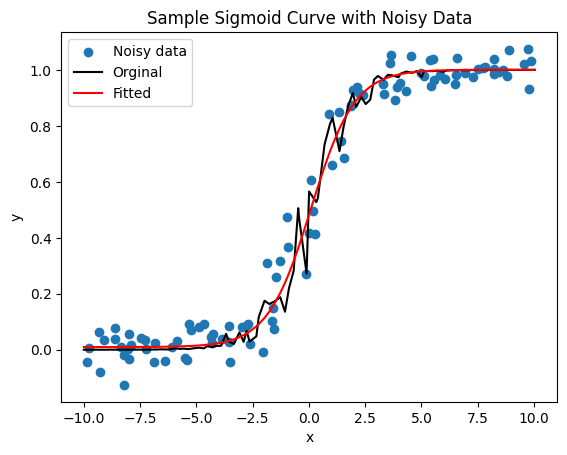

In [93]:
plt.scatter(x_noisy, y_noisy, label='Noisy data')
plt.plot(x, y, 'k-', label='Orginal')
plt.plot(x, fit_y, 'r-', label='Fitted')
plt.title('Sample Sigmoid Curve with Noisy Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [94]:
def electrodePlot():
    all_params = []
    fig, axs = plt.subplots(4,4, figsize= (15,15))
    for i in range(16):
        row = i // 4  # Calculate the row index
        col = i % 4   # Calculate the column index
        x, y_noisy = toyData(mu = np.random.rand(),std = 0.2)
        fit_y, params = fitCurve(x, y_noisy)
        all_params.append(params)
        axs[row, col].scatter(x, y_noisy, label='Noisy data')
        axs[row, col].plot(x, fit_y, 'r-', label='Fitted')
        axs[row, col].set_xlabel('x')
        axs[row, col].set_ylabel('y')
        axs[row, col].set_title('Electrode ' + str(i))
    plt.tight_layout()
    plt.show()
    df = pd.DataFrame(all_params, columns = ['L','x0','k','b'])
    return(df)

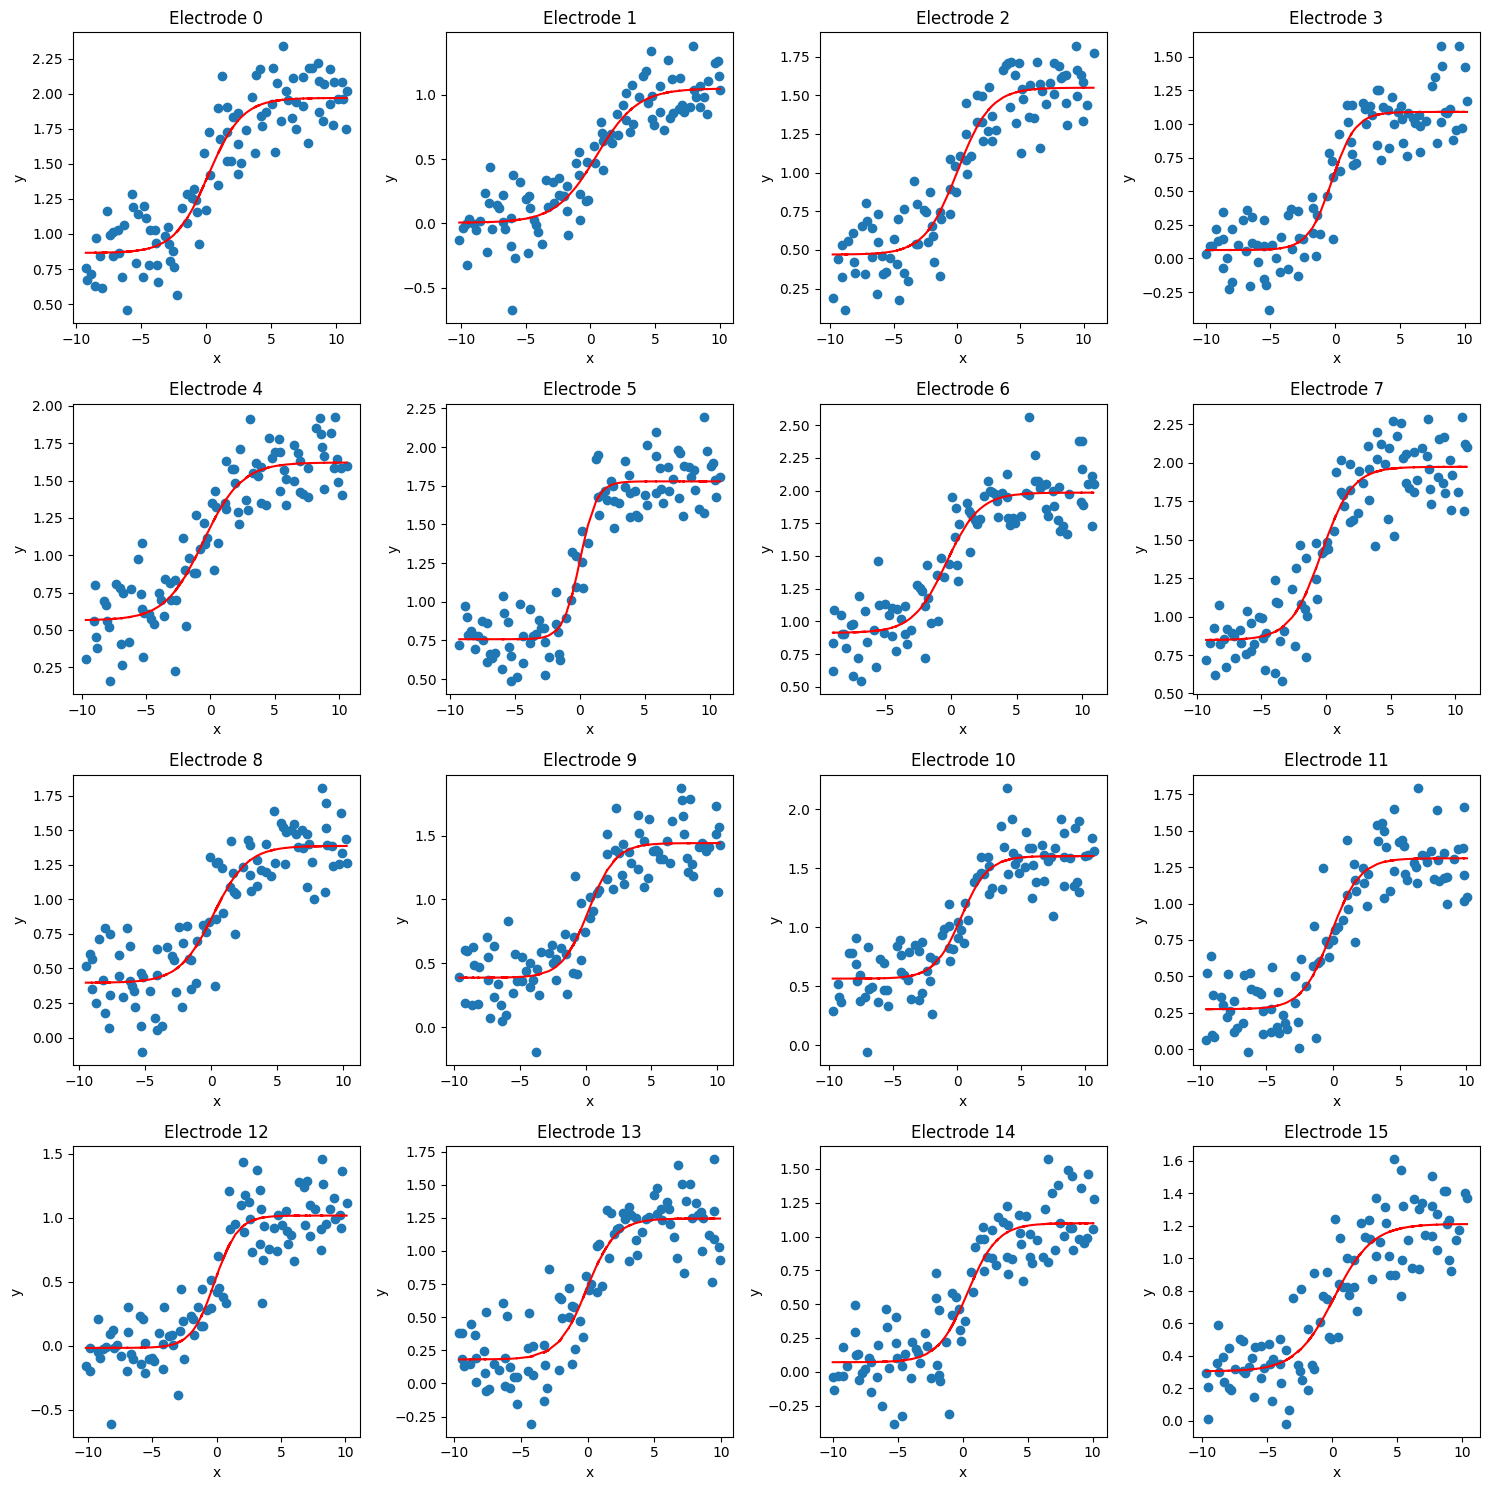

,L,x0,k,b
0,1.104588,0.162641,0.768628,0.864679
1,1.043102,0.491226,0.635401,0.005293
2,1.078202,0.039210,0.770950,0.470364
3,1.027445,-0.260414,1.103381,0.062679
4,1.057267,-0.551052,0.673424,0.564029
5,1.020837,0.017412,1.555521,0.757397
6,1.072356,-0.345953,0.792197,0.912091
7,1.125475,-0.362381,0.837073,0.847553
8,0.990668,0.182471,0.773596,0.396689
9,1.053617,0.228560,0.979343,0.387654


In [95]:
df = electrodePlot()
df